In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
out_files = os.listdir('./outputs/')


In [6]:
total_energy = []
e_fermi = []
for file in out_files:
    temp_file = open(f'./outputs/{file}', 'r').readlines()
    for i in range(len(temp_file)):
        if len(temp_file[i].split())>2:
            if temp_file[i].split()[0]=='!':
                temp_en=temp_file[i].split()[4]
            if temp_file[i].split()[0]=='the':
                temp_fermi=temp_file[i].split()[-2]
    total_energy.append([float(temp_en),float(file[:-8])])
    e_fermi.append([float(temp_fermi),float(file[:-8])])
    
tot_en = np.array(total_energy)
tot_en = tot_en[tot_en[:, 1].argsort()]


e_f = np.array(e_fermi)
e_f = e_f[e_f[:, 1].argsort()]





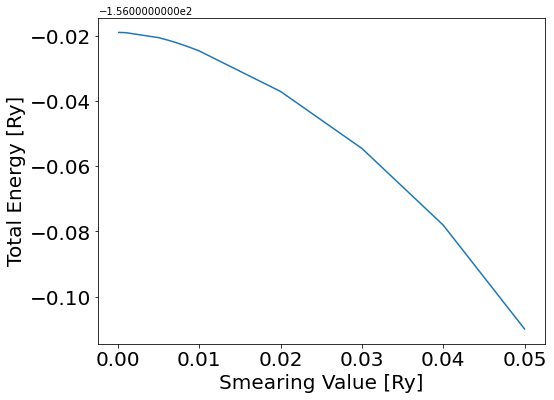

In [42]:
fig = plt.figure(figsize=(8,6))
plt.plot(tot_en.T[1],tot_en.T[0])
plt.ylabel('Total Energy [Ry]',fontsize=20)
plt.xlabel('Smearing Value [Ry]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(0,0.01)
# plt.ylim(-0.03,-0.01)
plt.savefig('total_sigma.jpg')



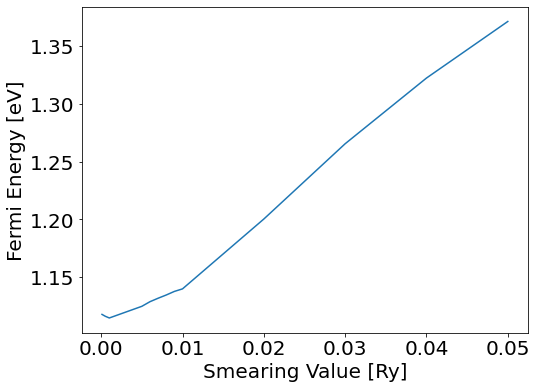

In [40]:
fig = plt.figure(figsize=(8,6))
plt.plot(e_f.T[1],e_f.T[0])
plt.ylabel('Fermi Energy [eV]',fontsize=20)
plt.xlabel('Smearing Value [Ry]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim(0,0.01)
# plt.ylim(1,1.20)
# plt.show()
plt.savefig('total_fermi.png')




In [22]:
band_files = os.listdir('./bands/')

sigmas = [float(i[:-14])for i in band_files]


In [23]:
def Symmetries(fstring):
    f = open(fstring, 'r')
    x = np.zeros(0)
    for i in f:
        x = np.append(x, float(i.split()[-1]))
    f.close()
    return x

In [24]:
def read_efermi(path):
    lines = open(path, 'r').readlines()
    e_fermi = 0
    for i in lines:
        if "the Fermi energy is" in i:
            e_fermi = float(i.split()[-2])
            return e_fermi

In [25]:
fermi=[]
for sigma in sigmas:
    temp_file = open(f'./outputs/{sigma}-scf.out', 'r').readlines()
    for i in range(len(temp_file)):
        if len(temp_file[i].split())>2:
            if temp_file[i].split()[0]=='the':
                temp_fermi=temp_file[i].split()[-2]
                fermi.append([float(temp_fermi),str(sigma)])

In [26]:
np.array(fermi).T[0]

array(['1.1288', '1.3225', '1.2656', '1.1147', '1.1248', '1.1178',
       '1.1346', '1.1162', '1.1377', '1.2004', '1.1318', '1.1399',
       '1.3715'], dtype='<U32')

In [27]:
sym = [ 0.0000, 0.5774,0.9107,1.5774]

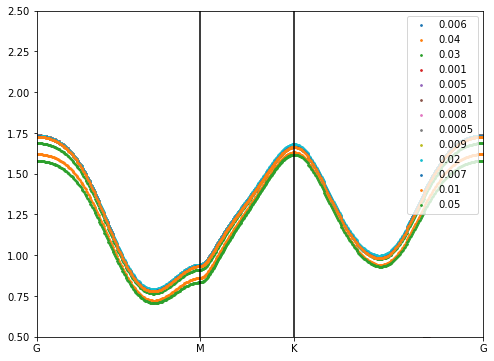

In [36]:
fig = plt.figure(figsize=(8,6))
for i in range(len(sigmas)):
    temp_data = np.loadtxt(f'./bands/{sigmas[i]}.bands.dat.gnu')
    ef = np.array(fermi).T[0][i].astype(float)
    plt.scatter(temp_data.T[0],temp_data.T[1],s=3,label=sigmas[i])
plt.xticks(sym,['G','M','K','G'])
plt.axvline(sym[1],c='black')
plt.axvline(sym[2],c='black')
plt.axhline(0,c='red')
plt.ylim(-1,1)
plt.ylim(0.5,2.5)
plt.xlim(0,1.5774)
plt.legend()
plt.savefig('band.png')
plt.show()

In [14]:
band_files

['0.006.bands.dat.gnu',
 '0.04.bands.dat.gnu',
 '0.03.bands.dat.gnu',
 '0.001.bands.dat.gnu',
 '0.005.bands.dat.gnu',
 '0.0001.bands.dat.gnu',
 '0.008.bands.dat.gnu',
 '0.0005.bands.dat.gnu',
 '0.009.bands.dat.gnu',
 '0.02.bands.dat.gnu',
 '0.007.bands.dat.gnu',
 '0.01.bands.dat.gnu',
 '0.05.bands.dat.gnu']

In [49]:
    e_fermi.append([float(temp_fermi),float(file[:-8])])



[0.0001,
 0.0005,
 0.001,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05]

In [45]:
sigmas.sort()

In [46]:
sigmas

[0.0001,
 0.0005,
 0.001,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05]